In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [3]:
# Normalization
x_train= x_train.astype('float32')/255.0
x_test= x_test.astype('float32')/255.0

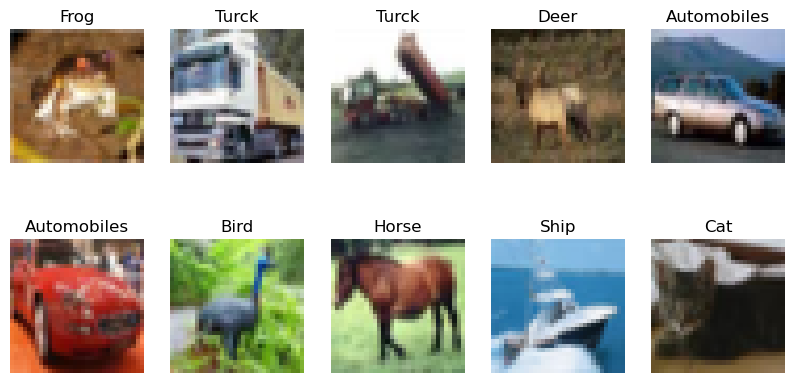

In [4]:
classes=['Airoplane','Automobiles','Bird','Cat', 'Deer','Dog','Frog', 'Horse', 'Ship','Turck']
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
# Create CNN Model
x=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                    layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
                    layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
                    layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dense(32,activation='relu'),
layers.Dense(15,activation='softmax')])

In [7]:
# Compile the model

x.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Train tha model
y=x.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2675 - loss: 1.9919 - val_accuracy: 0.4695 - val_loss: 1.4703
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4998 - loss: 1.3933 - val_accuracy: 0.5456 - val_loss: 1.2848
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5699 - loss: 1.2149 - val_accuracy: 0.6011 - val_loss: 1.1470
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6056 - loss: 1.1006 - val_accuracy: 0.6129 - val_loss: 1.0896
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6411 - loss: 1.0239 - val_accuracy: 0.6174 - val_loss: 1.1286
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6656 - loss: 0.9567 - val_accuracy: 0.6441 - val_loss: 1.0192
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6824 - loss: 0.8998 - val_accuracy: 0.6634 - val_loss: 0.9815
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7026 - loss: 0.8580 - 

In [9]:
losses,accuracy=x.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6740 - loss: 0.9668
0.6739000082015991
